In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica') 
#plt.rc('text', usetex='false') 
# plt.rcParams.update({'font.size': 25})

my_quali_colormaps = ['colorblind', 'Dark2']
final_OD_palette = {'ON': '#e2a936', 'OFF': '#a5abc1'}
std_final_OD_palette = {'Batch culture | Plasticity = ON': '#a17726', 'Batch culture | Plasticity = OFF': '#5c6895', 
                        'Continuous culture | Plasticity = ON': '#e2a936', 'Continuous culture | Plasticity = OFF': '#a5abc1'}

In [7]:
import os
storage = os.environ['MICOM_EXP'] + 'setA_mono_simTime144h/' # on Peregrine
storage

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t")

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1, ['rep_name', 'simID']].groupby('rep_name')['simID'].apply(list).to_dict()
rep_simID_dict

rep_name_list = list(rep_simID_dict.keys())
rep_name_list

media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

replicates = rep_name_list
speciesID='setA_6'
simID = "setA_6_plastic"

# plot_OD_over_time

In [8]:
culture_type = 'batch'

#### Prepare data frame
merged_data = pd.DataFrame()
for rep in replicates:
    for m in media:

        data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + culture_type + '_mono-culture/'  + m + '/'
        data_file = data_dir + 'species_trajectory.tsv'

        df = pd.read_csv(data_file, sep="\t", usecols=['time', 'od'])
        df['media'] = m
        df['replicate'] = rep

        merged_data = pd.concat([merged_data, df])

    merged_data.reset_index(drop=True)

In [9]:
merged_data

time         od       media replicate
0   0.000000   0.001000      EU_avg      rep1
1   0.034190   0.001519      EU_avg      rep1
2   0.082190   0.002730      EU_avg      rep1
3   0.114802   0.004066      EU_avg      rep1
4   0.146192   0.005966      EU_avg      rep1
..       ...        ...         ...       ...
49  1.237610  20.723200  vegetarian      rep3
50  1.261750  20.723200  vegetarian      rep3
51  1.286010  20.723200  vegetarian      rep3
52  1.310310  20.723200  vegetarian      rep3
53  1.317900  20.723200  vegetarian      rep3

[3089 rows x 4 columns]

[Text(0.5, 0, 'Time (h)'), Text(0, 0.5, 'OD')]

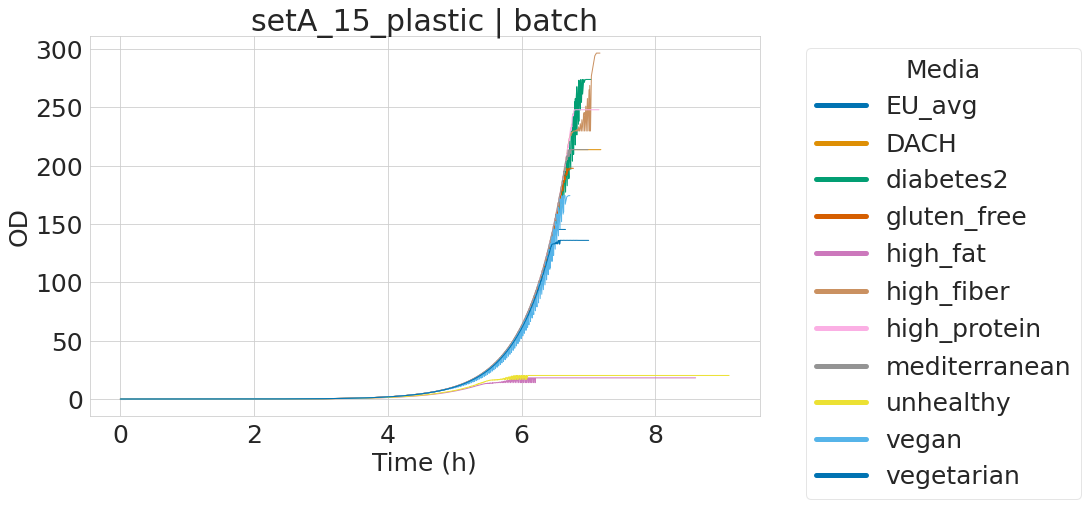

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

kwargs={'linewidth':1}

p = sns.lineplot(data=merged_data, x='time', y='od', hue='media', 
                 estimator='mean', ci='sd', err_kws={'alpha': 0.2}, # line represents mean across replicates, and shaded area represents standard deviation
                 palette=sns.color_palette(my_quali_colormaps[0], len(media)), ax=ax, **kwargs)

# Put the legend out of the figure
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title="Media", framealpha=0.5)
# Change width of lines in legend
for line in leg.get_lines():
    line.set_linewidth(5)

# Add title
title = simID + " | " + culture_type 
ax.set_title(title)
ax.set(xlabel='Time (h)', ylabel='OD')

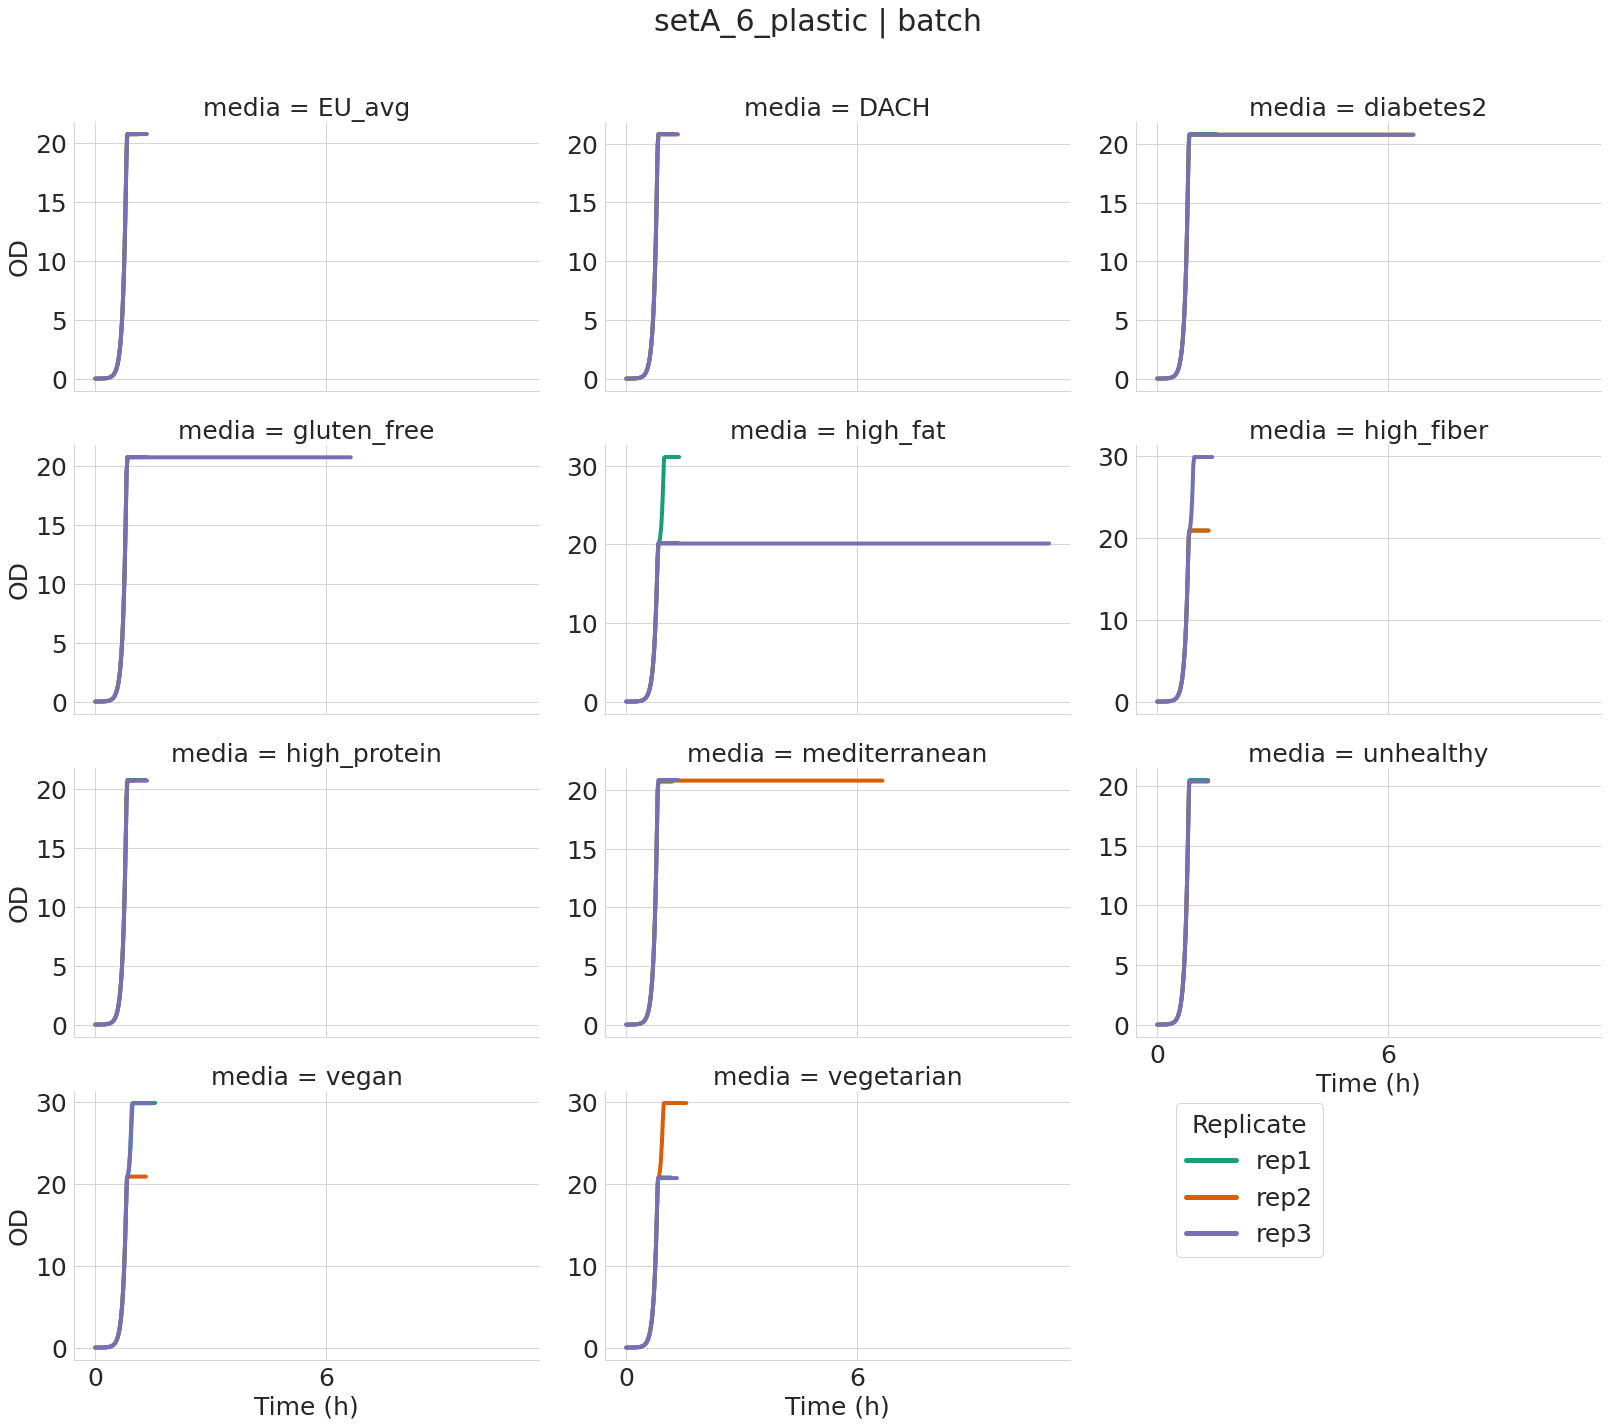

In [10]:
max_time = merged_data['time'].max()

kwargs={'linewidth':4, 'palette': sns.color_palette(my_quali_colormaps[1], len(replicates))}

grid = sns.FacetGrid(data=merged_data,  col='media', col_wrap=3, sharex=True, sharey=False, legend_out=True, height=5, aspect=1.5)

grid.map_dataframe(sns.lineplot, data=merged_data, x='time', y='od', hue='replicate', **kwargs)

# General settings
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle(simID + " | " + culture_type, fontsize=30)
grid.set_xlabels("Time (h)")
grid.set_ylabels("OD")
# grid.fig.subplots_adjust(wspace=0.2, hspace=0.2)
# grid.fig.set_size_inches(15,17)

# x-axis ticks
if max_time <= 24.0:
    grid.set(xticks=np.arange(0.0, max_time, 6.0))
elif max_time <= 72.0:
    grid.set(xticks=np.arange(0.0, max_time, 12.0))
else:
    grid.set(xticks=np.arange(0.0, max_time, 24.0))

legnd = grid.axes[10].legend(loc='upper left', bbox_to_anchor=(1.2, 1.0), title='Replicate')
# Change width of lines in legend
for line in legnd.get_lines():
    line.set_linewidth(5)

# plot_final_OD

In [7]:
culture_type = 'batch'

new_labels = {'plastic': 'ON', 'sfm': 'OFF'}

final_OD_file = storage + "final_point." + culture_type + "_mono-culture.od.tsv"

final_OD = pd.read_csv(final_OD_file, sep="\t")
final_OD = final_OD.loc[final_OD['species_ID']==speciesID, :].reset_index(drop=True).replace({"mode": new_labels}).rename(columns = {'mode':'plasticity'})

final_OD

rep_name species_ID plasticity     EU_avg       DACH  diabetes2  \
0     rep1    setA_15         ON  145.45200  213.83200  273.53400   
1     rep1    setA_15        OFF    6.02161    5.98379    5.96654   
2     rep2    setA_15         ON  145.41400  213.83000  273.98500   
3     rep2    setA_15        OFF    6.02159    5.98379    5.96656   
4     rep3    setA_15         ON  145.41800  213.83200  274.05900   
5     rep3    setA_15        OFF    6.02159    5.98378    5.96656   

   gluten_free  high_fat  high_fiber  high_protein  mediterranean  unhealthy  \
0    197.86400  18.13780   229.81100     248.07100      213.84600   20.20660   
1      6.00141   6.97782     5.97158       5.97017        5.97983    6.78005   
2    197.91500  14.01120   229.81100     248.10500      213.93000   16.70700   
3      6.00140   6.97785     5.97158       5.97013        5.97984    6.78004   
4    197.86300  18.12590   296.64500     248.06100      213.85300   20.21050   
5      6.00141   6.97782     5.97158       5.97013        5.97984    6.78002   

       vegan  vegetarian  
0  174.26500   132.95700  
1    5.97950     6.02548  
2  174.40400   136.12100  
3    5.97951     6.02547  
4  174.43100   136.06000  
5    5.97949     6.02549

In [8]:
final_OD_melted = pd.melt(final_OD, id_vars=['rep_name', 'species_ID', 'plasticity'], value_vars=media, 
                          var_name='media', value_name='final_OD')
final_OD_melted

rep_name species_ID plasticity       media   final_OD
0      rep1    setA_15         ON      EU_avg  145.45200
1      rep1    setA_15        OFF      EU_avg    6.02161
2      rep2    setA_15         ON      EU_avg  145.41400
3      rep2    setA_15        OFF      EU_avg    6.02159
4      rep3    setA_15         ON      EU_avg  145.41800
..      ...        ...        ...         ...        ...
61     rep1    setA_15        OFF  vegetarian    6.02548
62     rep2    setA_15         ON  vegetarian  136.12100
63     rep2    setA_15        OFF  vegetarian    6.02547
64     rep3    setA_15         ON  vegetarian  136.06000
65     rep3    setA_15        OFF  vegetarian    6.02549

[66 rows x 5 columns]

[Text(0.5, 0, 'Media'), Text(0, 0.5, 'OD at final time point')]

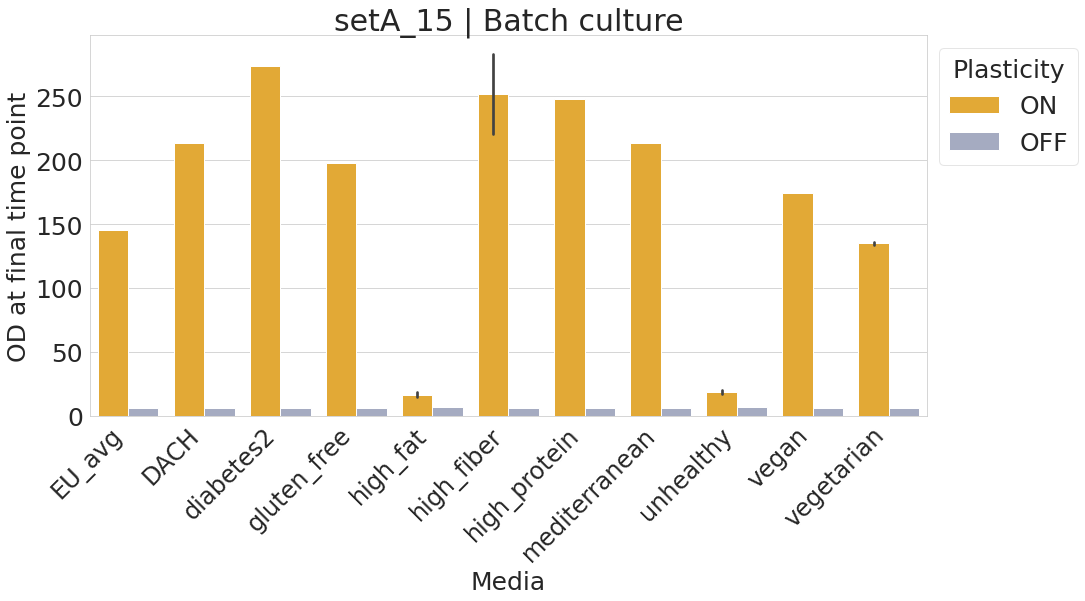

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=final_OD_melted, x='media', y='final_OD', hue='plasticity', 
            ci='sd', palette=final_OD_palette, saturation=1.0, ax=ax)

xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation = 45, ha="right", 
                   fontdict={'fontsize': 24})

# Put the legend out of the figure
ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2, title="Plasticity", framealpha=0.5)

# Add title
title = speciesID + " | " + culture_type.capitalize() + " culture" 
ax.set_title(title)
ax.set(xlabel='Media', ylabel='OD at final time point')

In [10]:
culture_type = ['batch', 'continuous']

new_labels = {'plastic': 'ON', 'sfm': 'OFF'}

merged_data = pd.DataFrame()
for cult in culture_type:
    final_OD_file = storage + "final_point." + cult + "_mono-culture.od.tsv"

    final_OD = pd.read_csv(final_OD_file, sep="\t")
    final_OD = final_OD.loc[final_OD['species_ID']==speciesID, :].reset_index(drop=True)

    final_OD_melted = pd.melt(final_OD, id_vars=['rep_name', 'species_ID', 'mode'], value_vars=media, 
                              var_name='media', value_name='final_OD')
    final_OD_melted = final_OD_melted.replace({"mode": new_labels}).rename(columns = {'mode':'plasticity'})
    final_OD_melted['culture_type'] = cult
    
    merged_data = pd.concat([merged_data, final_OD_melted])
merged_data.reset_index(drop=True)

rep_name species_ID plasticity       media   final_OD culture_type
0       rep1    setA_15         ON      EU_avg  145.45200        batch
1       rep1    setA_15        OFF      EU_avg    6.02161        batch
2       rep2    setA_15         ON      EU_avg  145.41400        batch
3       rep2    setA_15        OFF      EU_avg    6.02159        batch
4       rep3    setA_15         ON      EU_avg  145.41800        batch
..       ...        ...        ...         ...        ...          ...
127     rep1    setA_15        OFF  vegetarian    3.21867   continuous
128     rep2    setA_15         ON  vegetarian   77.18510   continuous
129     rep2    setA_15        OFF  vegetarian    3.21867   continuous
130     rep3    setA_15         ON  vegetarian   55.96690   continuous
131     rep3    setA_15        OFF  vegetarian    3.21867   continuous

[132 rows x 6 columns]

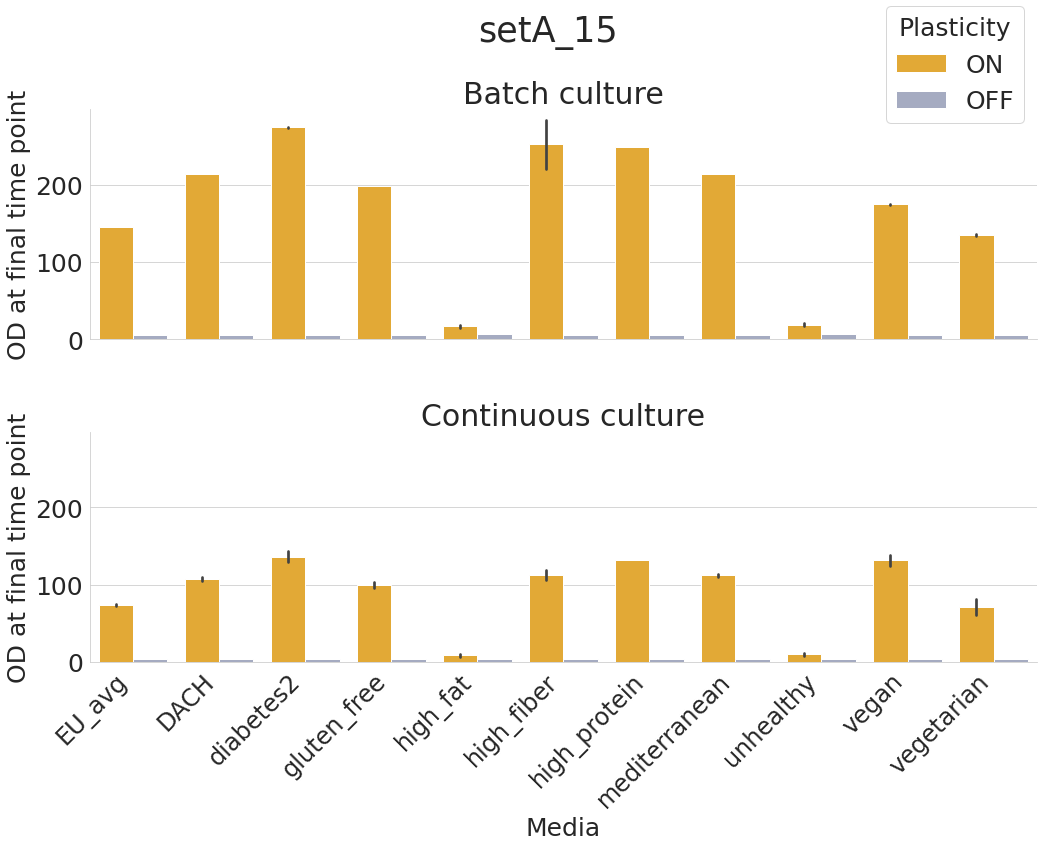

In [11]:
kwargs={'ci': 'sd', 'palette': final_OD_palette, 'saturation': 1.0}

grid = sns.FacetGrid(data=merged_data,  row='culture_type', sharex=True, sharey=True, legend_out=True, height=5, aspect=3)

grid.map_dataframe(sns.barplot, data=merged_data, x='media', y='final_OD', hue='plasticity', **kwargs)

# General settings
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle(speciesID, fontsize=35)
grid.set_xlabels("Media")
grid.set_ylabels("OD at final time point")
grid.fig.subplots_adjust(wspace=0.2, hspace=0.4)
# grid.fig.set_size_inches(15,17)

for i in range(len(culture_type)):
    grid.axes[i,0].set_title(culture_type[i].capitalize() + ' culture')

legnd = grid.axes[0,0].legend(loc='upper right', bbox_to_anchor=(1.0, 1.5), title='Plasticity')

xticklabels = grid.axes[1,0].get_xticklabels()
grid.set_xticklabels(xticklabels, rotation = 45, ha="right", fontdict={'fontsize': 24})

# plot_std_final_OD

In [12]:
culture_type = ['batch', 'continuous']

new_labels = {'batch_plastic': 'Batch culture | Plasticity = ON', 'batch_sfm': 'Batch culture | Plasticity = OFF', 
              'continuous_plastic': 'Continuous culture | Plasticity = ON', 'continuous_sfm': 'Continuous culture | Plasticity = OFF'}

merged_data = pd.DataFrame()
for cult in culture_type:
    final_OD_file = storage + "final_point." + cult + "_mono-culture.od.tsv"

    final_OD = pd.read_csv(final_OD_file, sep="\t")
    final_OD = final_OD.loc[final_OD['species_ID']==speciesID, :].reset_index(drop=True)

    final_OD_melted = pd.melt(final_OD, id_vars=['rep_name', 'species_ID', 'mode'], value_vars=media, 
                              var_name='media', value_name='final_OD')
    final_OD_melted['label'] = cult + '_' + final_OD_melted['mode']
    final_OD_melted = final_OD_melted.replace({'label': new_labels})
    
    merged_data = pd.concat([merged_data, final_OD_melted])
merged_data.reset_index(drop=True)

rep_name species_ID     mode       media   final_OD  \
0       rep1    setA_15  plastic      EU_avg  145.45200   
1       rep1    setA_15      sfm      EU_avg    6.02161   
2       rep2    setA_15  plastic      EU_avg  145.41400   
3       rep2    setA_15      sfm      EU_avg    6.02159   
4       rep3    setA_15  plastic      EU_avg  145.41800   
..       ...        ...      ...         ...        ...   
127     rep1    setA_15      sfm  vegetarian    3.21867   
128     rep2    setA_15  plastic  vegetarian   77.18510   
129     rep2    setA_15      sfm  vegetarian    3.21867   
130     rep3    setA_15  plastic  vegetarian   55.96690   
131     rep3    setA_15      sfm  vegetarian    3.21867   

                                     label  
0          Batch culture | Plasticity = ON  
1         Batch culture | Plasticity = OFF  
2          Batch culture | Plasticity = ON  
3         Batch culture | Plasticity = OFF  
4          Batch culture | Plasticity = ON  
..                                     ...  
127  Continuous culture | Plasticity = OFF  
128   Continuous culture | Plasticity = ON  
129  Continuous culture | Plasticity = OFF  
130   Continuous culture | Plasticity = ON  
131  Continuous culture | Plasticity = OFF  

[132 rows x 6 columns]

In [13]:
std_df = merged_data.groupby(['media', 'label']).std().reset_index().rename(columns = {'final_OD':'std_final_OD'})
std_df

media                                  label  std_final_OD
0            DACH       Batch culture | Plasticity = OFF      0.000006
1            DACH        Batch culture | Plasticity = ON      0.001155
2            DACH  Continuous culture | Plasticity = OFF      0.000000
3            DACH   Continuous culture | Plasticity = ON      2.851424
4          EU_avg       Batch culture | Plasticity = OFF      0.000012
5          EU_avg        Batch culture | Plasticity = ON      0.020881
6          EU_avg  Continuous culture | Plasticity = OFF      0.000000
7          EU_avg   Continuous culture | Plasticity = ON      1.698274
8       diabetes2       Batch culture | Plasticity = OFF      0.000012
9       diabetes2        Batch culture | Plasticity = ON      0.284166
10      diabetes2  Continuous culture | Plasticity = OFF      0.000000
11      diabetes2   Continuous culture | Plasticity = ON      8.835414
12    gluten_free       Batch culture | Plasticity = OFF      0.000006
13    gluten_free        Batch culture | Plasticity = ON      0.029738
14    gluten_free  Continuous culture | Plasticity = OFF      0.000000
15    gluten_free   Continuous culture | Plasticity = ON      5.052800
16       high_fat       Batch culture | Plasticity = OFF      0.000017
17       high_fat        Batch culture | Plasticity = ON      2.379066
18       high_fat  Continuous culture | Plasticity = OFF      0.000000
19       high_fat   Continuous culture | Plasticity = ON      2.191082
20     high_fiber       Batch culture | Plasticity = OFF      0.000000
21     high_fiber        Batch culture | Plasticity = ON     38.586628
22     high_fiber  Continuous culture | Plasticity = OFF      0.000000
23     high_fiber   Continuous culture | Plasticity = ON      7.728574
24   high_protein       Batch culture | Plasticity = OFF      0.000023
25   high_protein        Batch culture | Plasticity = ON      0.023065
26   high_protein  Continuous culture | Plasticity = OFF      0.000000
27   high_protein   Continuous culture | Plasticity = ON      0.001000
28  mediterranean       Batch culture | Plasticity = OFF      0.000006
29  mediterranean        Batch culture | Plasticity = ON      0.046608
30  mediterranean  Continuous culture | Plasticity = OFF      0.000000
31  mediterranean   Continuous culture | Plasticity = ON      2.187872
32      unhealthy       Batch culture | Plasticity = OFF      0.000015
33      unhealthy        Batch culture | Plasticity = ON      2.021622
34      unhealthy  Continuous culture | Plasticity = OFF      0.000000
35      unhealthy   Continuous culture | Plasticity = ON      2.095683
36          vegan       Batch culture | Plasticity = OFF      0.000010
37          vegan        Batch culture | Plasticity = ON      0.089075
38          vegan  Continuous culture | Plasticity = OFF      0.000000
39          vegan   Continuous culture | Plasticity = ON      8.438482
40     vegetarian       Batch culture | Plasticity = OFF      0.000010
41     vegetarian        Batch culture | Plasticity = ON      1.809384
42     vegetarian  Continuous culture | Plasticity = OFF      0.000000
43     vegetarian   Continuous culture | Plasticity = ON     13.069802

[Text(0.5, 0, 'Media'), Text(0, 0.5, 'Standard deviation in final OD')]

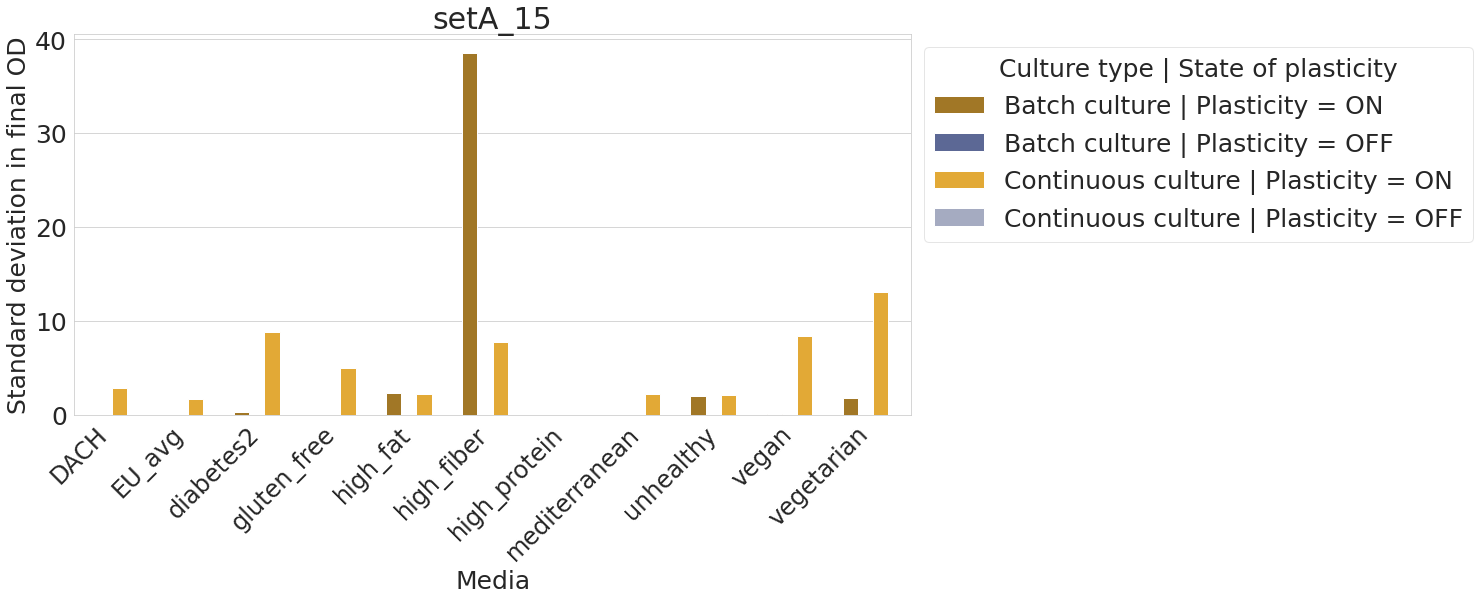

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data=std_df, x='media', y='std_final_OD', hue='label', hue_order=new_labels.values(),
            ci=None, palette=std_final_OD_palette, saturation=1.0, ax=ax)

xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, rotation = 45, ha="right", 
                   fontdict={'fontsize': 24})

# Put the legend out of the figure
ax.legend(bbox_to_anchor=(1.0, 1.0), loc=2, title="Culture type | State of plasticity", framealpha=0.5)

# Add title
title = speciesID 
ax.set_title(title)
ax.set(xlabel='Media', ylabel='Standard deviation in final OD')

# plot_growthRate_over_time

In [18]:
culture_type_list = ['batch', 'continuous']

#### Prepare data frame
merged_data = pd.DataFrame()
for cult in culture_type_list:
    for rep in replicates:
        for m in media:

            data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + cult + '_mono-culture/'  + m + '/'
            data_file = data_dir + 'species_trajectory.tsv'

            df = pd.read_csv(data_file, sep="\t", usecols=['time', 'r'])
            
            if cult == 'continuous':
                df = df.loc[df['time'] <= 24.0, :]
            
            df['media'] = m
            df['replicate'] = rep
            df['culture_type'] = cult

            merged_data = pd.concat([merged_data, df])

merged_data.reset_index(drop=True)

time          r       media replicate culture_type
0       0.000000  12.217700      EU_avg      rep1        batch
1       0.034190  12.217600      EU_avg      rep1        batch
2       0.082190  12.217600      EU_avg      rep1        batch
3       0.114802  12.217600      EU_avg      rep1        batch
4       0.146192  12.217600      EU_avg      rep1        batch
...          ...        ...         ...       ...          ...
39429  23.902900   0.097656  vegetarian      rep3   continuous
39430  23.927700   0.097668  vegetarian      rep3   continuous
39431  23.952700   0.097679  vegetarian      rep3   continuous
39432  23.977000   0.097690  vegetarian      rep3   continuous
39433  23.996100   0.097699  vegetarian      rep3   continuous

[39434 rows x 5 columns]

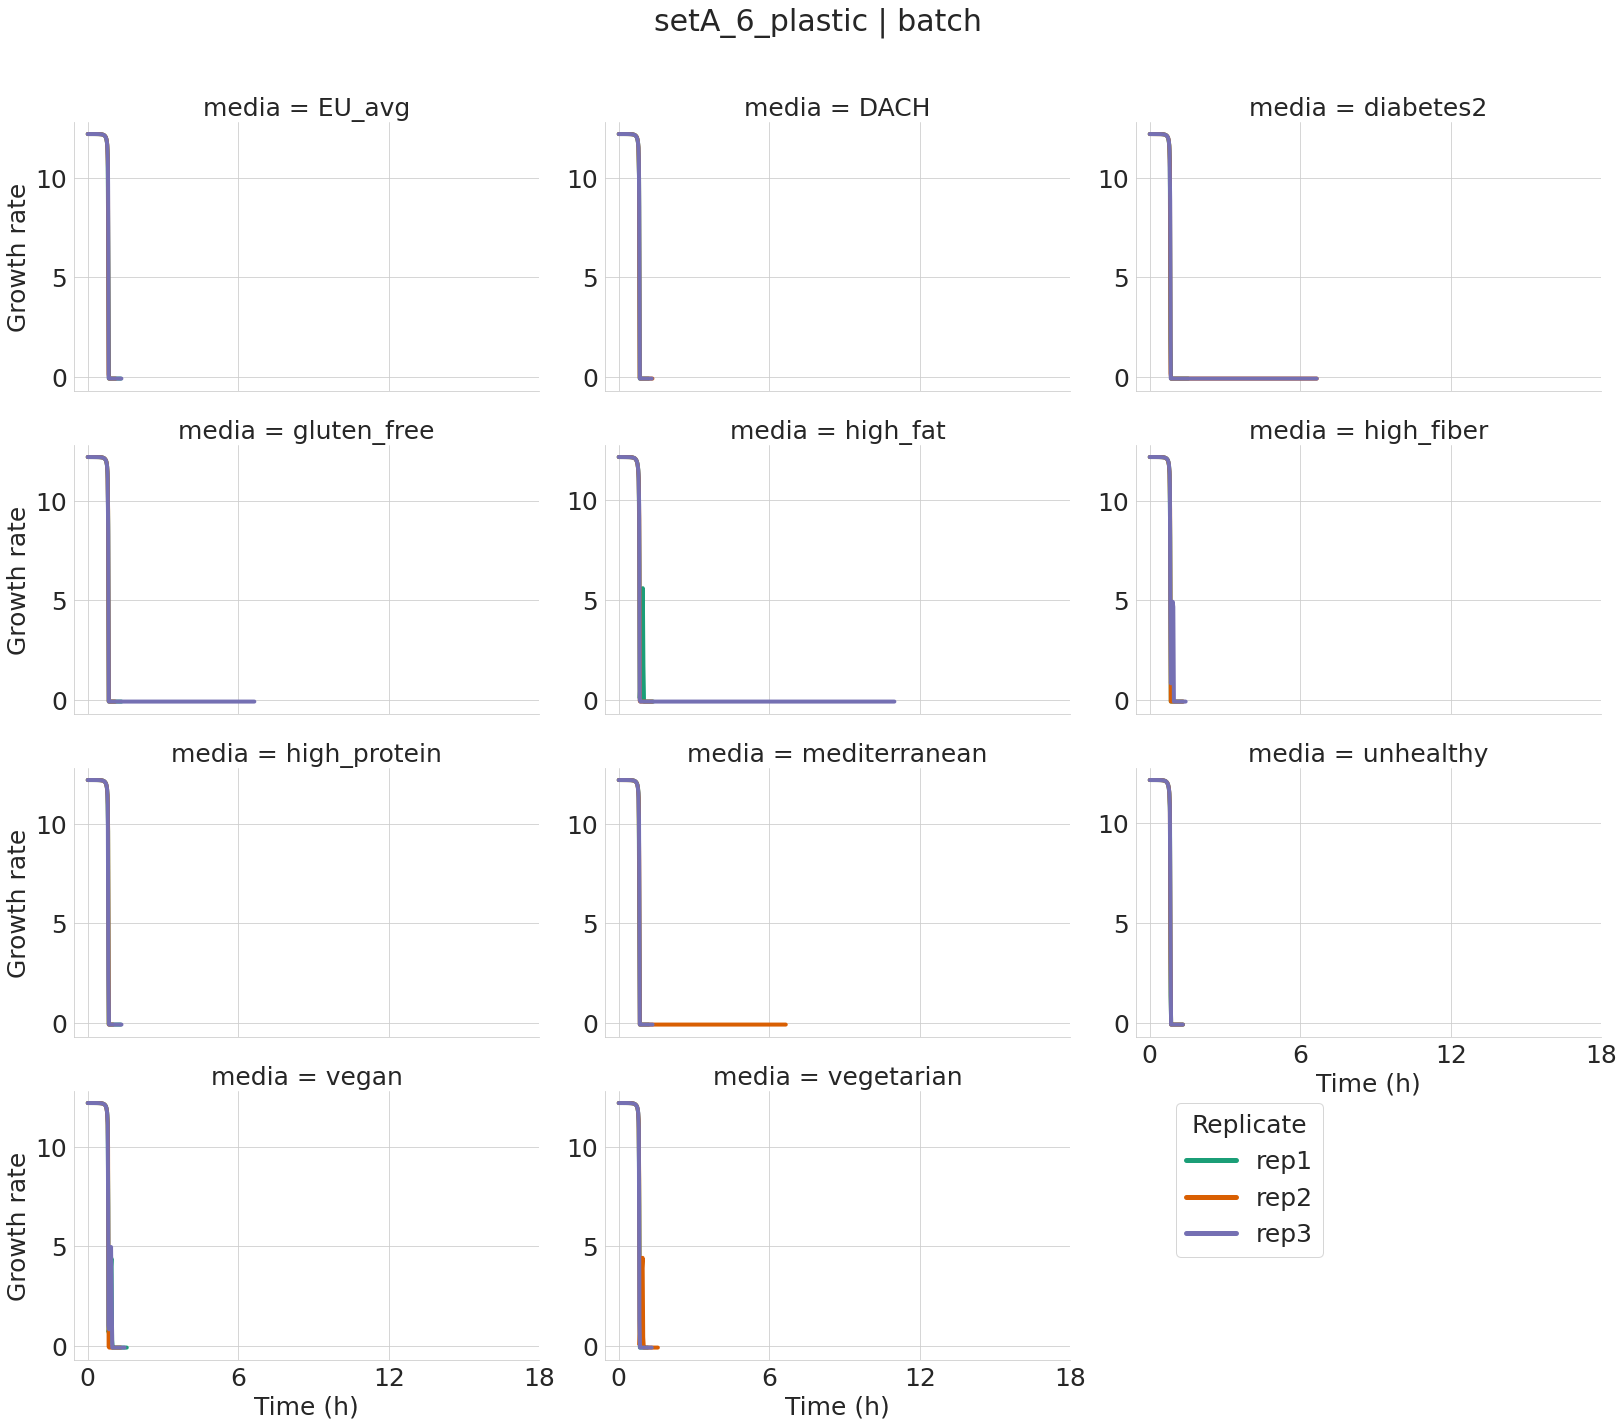

In [27]:
max_time = merged_data['time'].max()

kwargs={'linewidth':4, 'palette': sns.color_palette(my_quali_colormaps[1], len(replicates))}

grid = sns.FacetGrid(data=merged_data.loc[merged_data['culture_type']=='batch', :],  col='media', col_wrap=3, sharex=True, sharey=False, legend_out=True, height=5, aspect=1.5)

grid.map_dataframe(sns.lineplot, data=merged_data.loc[merged_data['culture_type']=='batch', :], x='time', y='r', hue='replicate', **kwargs)

# General settings
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle(simID + " | " + culture_type, fontsize=30)
grid.set_xlabels("Time (h)")
grid.set_ylabels("Growth rate")
# grid.fig.subplots_adjust(wspace=0.2, hspace=0.2)
# grid.fig.set_size_inches(15,17)

# x-axis ticks
if max_time <= 24.0:
    grid.set(xticks=np.arange(0.0, max_time, 6.0))
elif max_time <= 72.0:
    grid.set(xticks=np.arange(0.0, max_time, 12.0))
else:
    grid.set(xticks=np.arange(0.0, max_time, 24.0))

legnd = grid.axes[10].legend(loc='upper left', bbox_to_anchor=(1.2, 1.0), title='Replicate')
# Change width of lines in legend
for line in legnd.get_lines():
    line.set_linewidth(5)

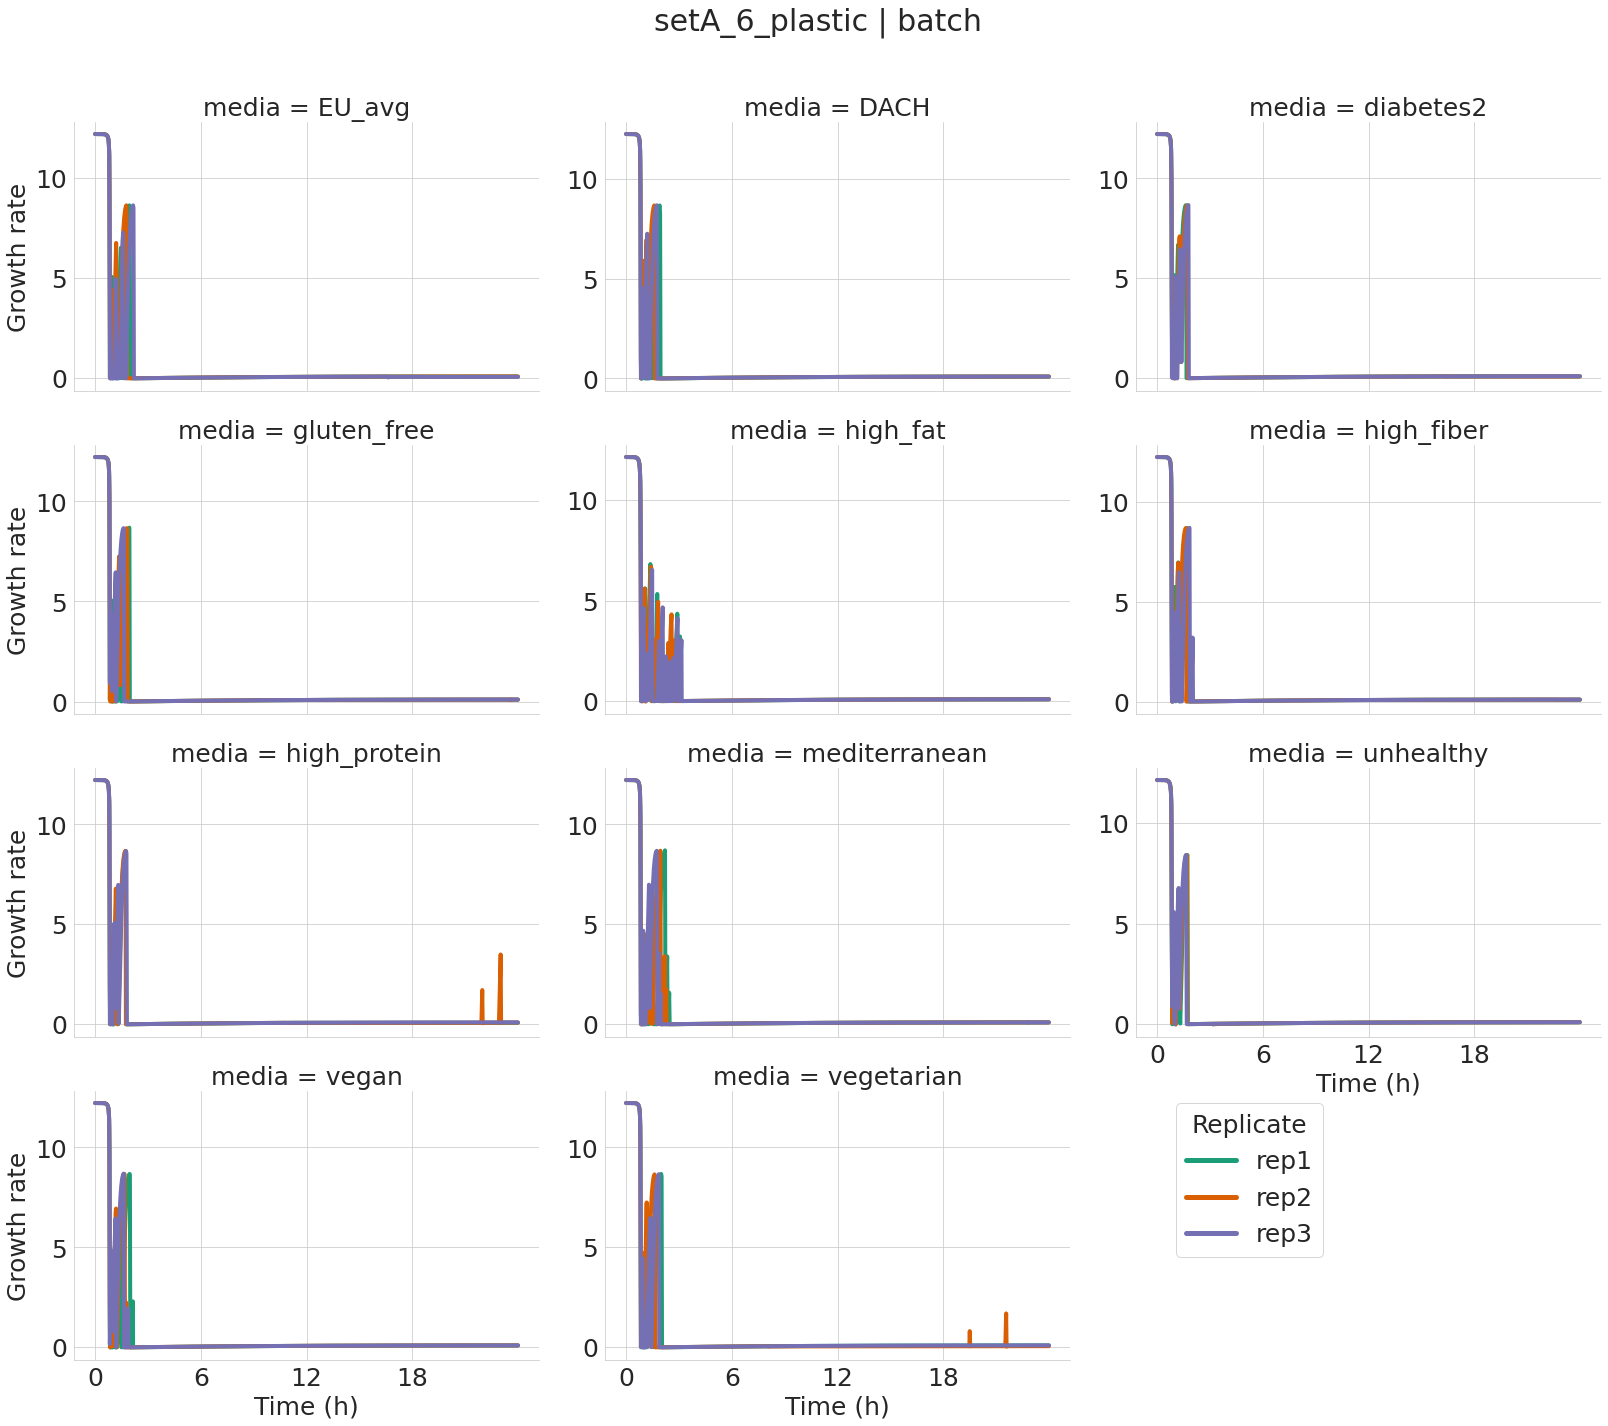

In [28]:
max_time = merged_data['time'].max()

kwargs={'linewidth':4, 'palette': sns.color_palette(my_quali_colormaps[1], len(replicates))}

grid = sns.FacetGrid(data=merged_data.loc[merged_data['culture_type']=='continuous', :],  col='media', col_wrap=3, sharex=True, sharey=False, legend_out=True, height=5, aspect=1.5)

grid.map_dataframe(sns.lineplot, data=merged_data.loc[merged_data['culture_type']=='continuous', :], x='time', y='r', hue='replicate', **kwargs)

# General settings
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle(simID + " | " + culture_type, fontsize=30)
grid.set_xlabels("Time (h)")
grid.set_ylabels("Growth rate")
# grid.fig.subplots_adjust(wspace=0.2, hspace=0.2)
# grid.fig.set_size_inches(15,17)

# x-axis ticks
if max_time <= 24.0:
    grid.set(xticks=np.arange(0.0, max_time, 6.0))
elif max_time <= 72.0:
    grid.set(xticks=np.arange(0.0, max_time, 12.0))
else:
    grid.set(xticks=np.arange(0.0, max_time, 24.0))

legnd = grid.axes[10].legend(loc='upper left', bbox_to_anchor=(1.2, 1.0), title='Replicate')
# Change width of lines in legend
for line in legnd.get_lines():
    line.set_linewidth(5)